# Navigation


### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`

In [2]:
env = UnityEnvironment(file_name="../Banana_Windows_x86/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [12]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

In [7]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Episode 100	Average Score: -0.26
Episode 200	Average Score: 0.692
Episode 300	Average Score: 2.40
Episode 400	Average Score: 4.40
Episode 500	Average Score: 5.77
Episode 600	Average Score: 6.84
Episode 700	Average Score: 8.24
Episode 800	Average Score: 10.15
Episode 900	Average Score: 10.86
Episode 1000	Average Score: 11.49
Episode 1100	Average Score: 12.86
Episode 1200	Average Score: 14.37
Episode 1264	Average Score: 15.02
Environment solved in 1164 episodes!	Average Score: 15.02


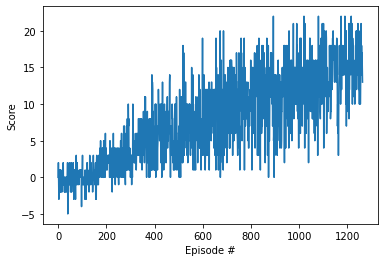

In [8]:
def dqn(n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0   
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('model.pt'))

totalscore=0
for i in range(100):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0   
    for j in range(1000):
        action = agent.act(state).astype(int)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]
        score += reward                                # update the score
        state = next_state  
        if done:
            break
    print("Score {}: {}".format(i,score))
    totalscore+=score

print(totalscore/100.0)
            

Score 0: 12.0
Score 1: 22.0
Score 2: 19.0
Score 3: 10.0
Score 4: -1.0
Score 5: 23.0
Score 6: 15.0
Score 7: 13.0
Score 8: 13.0
Score 9: 16.0
Score 10: 15.0
Score 11: 13.0
Score 12: 18.0
Score 13: 6.0
Score 14: 19.0
Score 15: 11.0
Score 16: 13.0
Score 17: 13.0
Score 18: 14.0
Score 19: 16.0
Score 20: 8.0
Score 21: 16.0
Score 22: 17.0
Score 23: 17.0
Score 24: 8.0
Score 25: 19.0
Score 26: 5.0
Score 27: 15.0
Score 28: 14.0
Score 29: 20.0
Score 30: 18.0
Score 31: 18.0
Score 32: 13.0
Score 33: 19.0
Score 34: 12.0
Score 35: 12.0
Score 36: 18.0
Score 37: 7.0
Score 38: 13.0
Score 39: 3.0
Score 40: 18.0
Score 41: 10.0
Score 42: 20.0
Score 43: 17.0
Score 44: 3.0
Score 45: 16.0
Score 46: 13.0
Score 47: 12.0
Score 48: 17.0
Score 49: 11.0
Score 50: 10.0
Score 51: 19.0
Score 52: 14.0
Score 53: 14.0
Score 54: 14.0
Score 55: 20.0
Score 56: 12.0
Score 57: 15.0
Score 58: 2.0
Score 59: 17.0
Score 60: 17.0
Score 61: 18.0
Score 62: 7.0
Score 63: 22.0
Score 64: 12.0
Score 65: 17.0
Score 66: 6.0
Score 67: 22.0


In [10]:
env.close()

In [11]:
print(agent)